In [1]:

from src.analysis.aggregate_trial_results import aggregate_trial_results
from src.analysis.clean_balance_filter import (
    print_rm_anova_summary,
    clean_balance_filter,
    run_repeated_measures_anova
)
from src.analysis.df_formatting import (
    print_nice_dataframe,
    make_long_df
)


def extract_and_apply_control_values(short_input_df, long_output_df):
    """
    Extracts control values from the short input DataFrame and applies them 
    to the long output DataFrame, modifying specific columns and adding a 
    'modified_control_values' column.

    If multiple rows match in the short input DataFrame, the matching rows are printed.

    Args:
        short_input_df (pd.DataFrame): The DataFrame to extract values from.
        long_output_df (pd.DataFrame): The DataFrame to modify.

    Returns:
        pd.DataFrame: The updated long output DataFrame.
    """
    # Identify the unique row in the short input DataFrame
    input_row_mask = (
        (short_input_df['task_instruction'] == 'coordinate') & 
        (short_input_df['task_reasoning'] == 'none') & 
        (short_input_df['task_options'] == 'letters') & 
        (short_input_df['model_name'] == 'llama-31-405b')
    )
    
    # Check the number of matching rows
    matching_rows = short_input_df[input_row_mask]
    if matching_rows.empty:
        raise ValueError("No matching rows found in the short input DataFrame.")
    elif len(matching_rows) > 1:
        print("Multiple matching rows found in the short input DataFrame:")
        print_nice_dataframe(matching_rows)
        return long_output_df  # Return the original DataFrame without modifications

    # Extract the required values
    input_row = matching_rows.iloc[0]
    convergence_value = input_row['convergence_answered']
    top_prop_value = input_row['top_option_count'] / input_row['answered_count']
    
    # Identify the unique row in the long output DataFrame
    output_row_mask = (
        (long_output_df['task_options'] == 'letters') & 
        (long_output_df['model'] == 'llama-31-405b')
    )
    
    # Ensure the 'long_output_df' has the required columns
    if 'top_prop_control' not in long_output_df.columns:
        long_output_df['top_prop_control'] = None
    if 'convergence_control' not in long_output_df.columns:
        long_output_df['convergence_control'] = None
    
    # Add the 'modified_control_values' column with default False
    long_output_df['modified_control_values'] = False
    
    # Update the target row in the long output DataFrame
    long_output_df.loc[output_row_mask, 'top_prop_control'] = top_prop_value
    long_output_df.loc[output_row_mask, 'convergence_control'] = convergence_value
    long_output_df.loc[output_row_mask, 'modified_control_values'] = True
    
    return long_output_df

# Create summary stats using default results folder path
aggregate_trial_results = aggregate_trial_results()

# Prepare data for analysis
cleaned_df_31 = clean_balance_filter(aggregate_trial_results, 'llama_31', verbose=False)

long_df_31 = make_long_df(cleaned_df_31)

extract_and_apply_control_values(cleaned_df_31, long_df_31)
# # Print the updated DataFrame
# print_nice_dataframe(long_df_31)

# # Run the repeated measures ANOVA
anova_results_31 = run_repeated_measures_anova(long_df_31)

Aggregated trial results saved to /workspaces/coordination/pipeline/4_analysis/trial_results_aggregated.csv
Data validation warning: 1 issue(s) found
Data preparation: removed 2 rows (unanswered) and 8 rows (balance)


In [2]:
#overview
# print_rm_anova_summary(anova_results_31)


Input DataFrame:
+---------------+----------------------+---------------------------------+------------------------------+-----------------------+------------------------------+---------------------------+--------------------+---------------------------+--------------+
| model         | task_options         |   convergence_without_reasoning |   convergence_with_reasoning |   convergence_control |   top_prop_without_reasoning |   top_prop_with_reasoning |   top_prop_control | modified_control_values   | model_size   |
+===============+======================+=================================+==============================+=======================+==============================+===========================+====================+===========================+==============+
| llama-31-405b | colours              |                        0.275694 |                     0.257222 |              0.514722 |                     0.391667 |                  0.391667 |           0.666667 | False        

/workspaces/coordination/src/analysis/visualization.py:327: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  fig.legend(handles=legend_handles,
/workspaces/coordination/src/analysis/visualization.py:327: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 2
  fig.legend(handles=legend_handles,


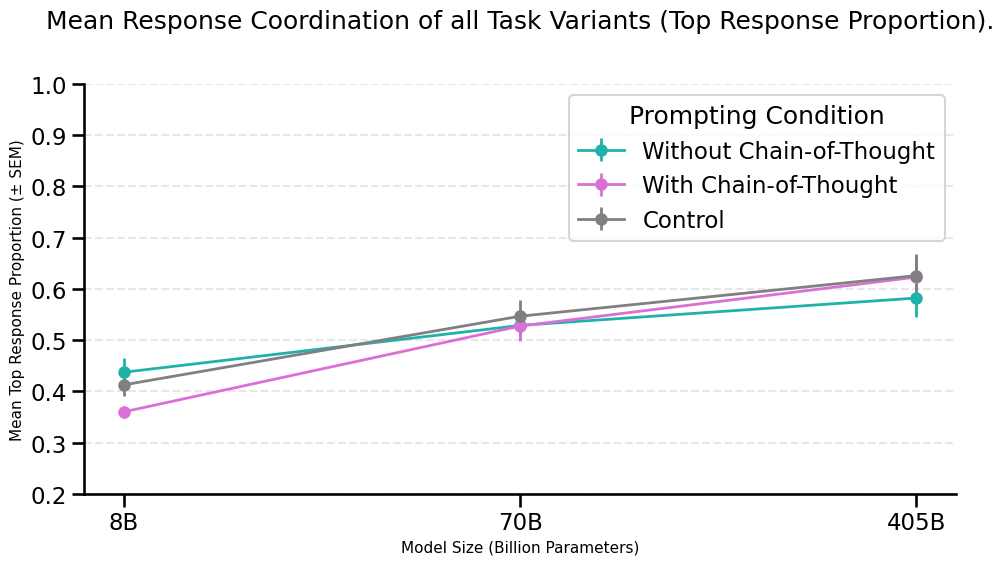

<Figure size 640x480 with 0 Axes>

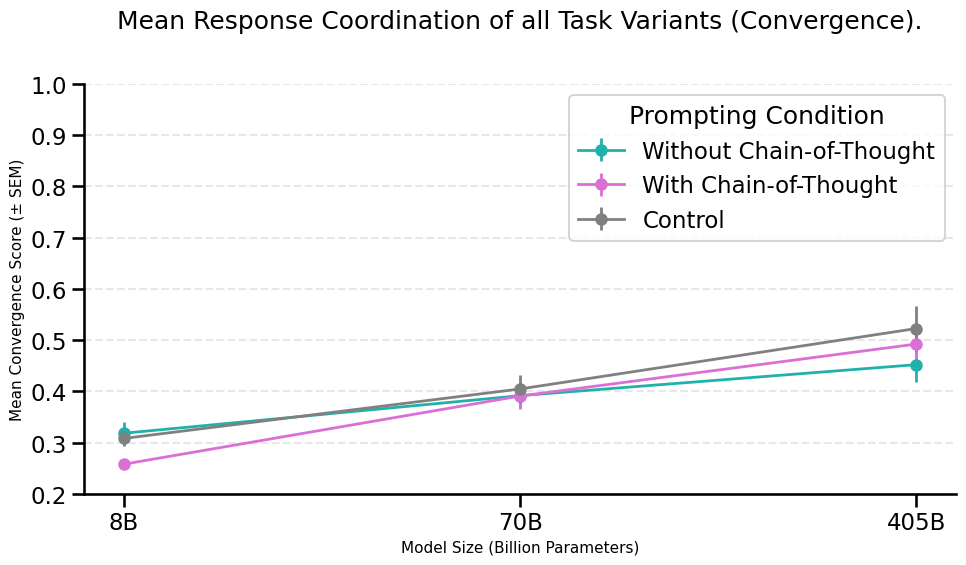

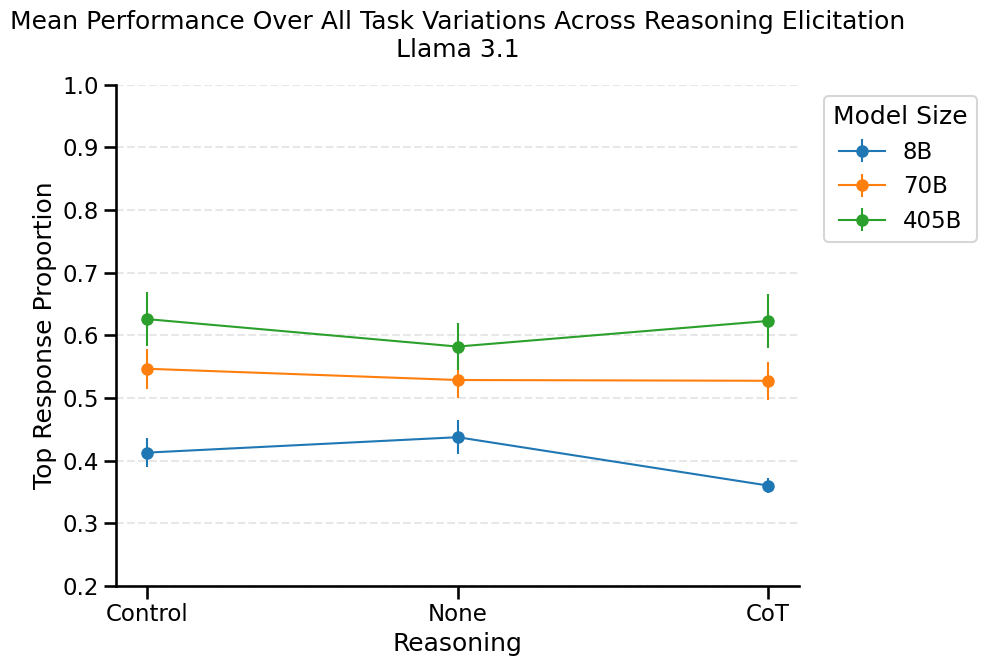

<Figure size 640x480 with 0 Axes>

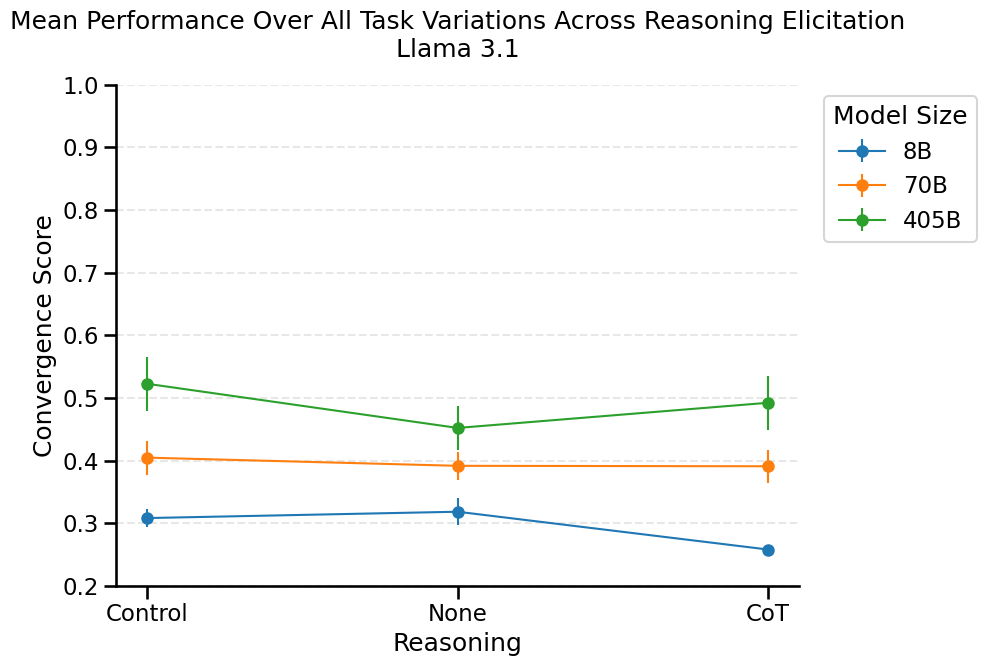

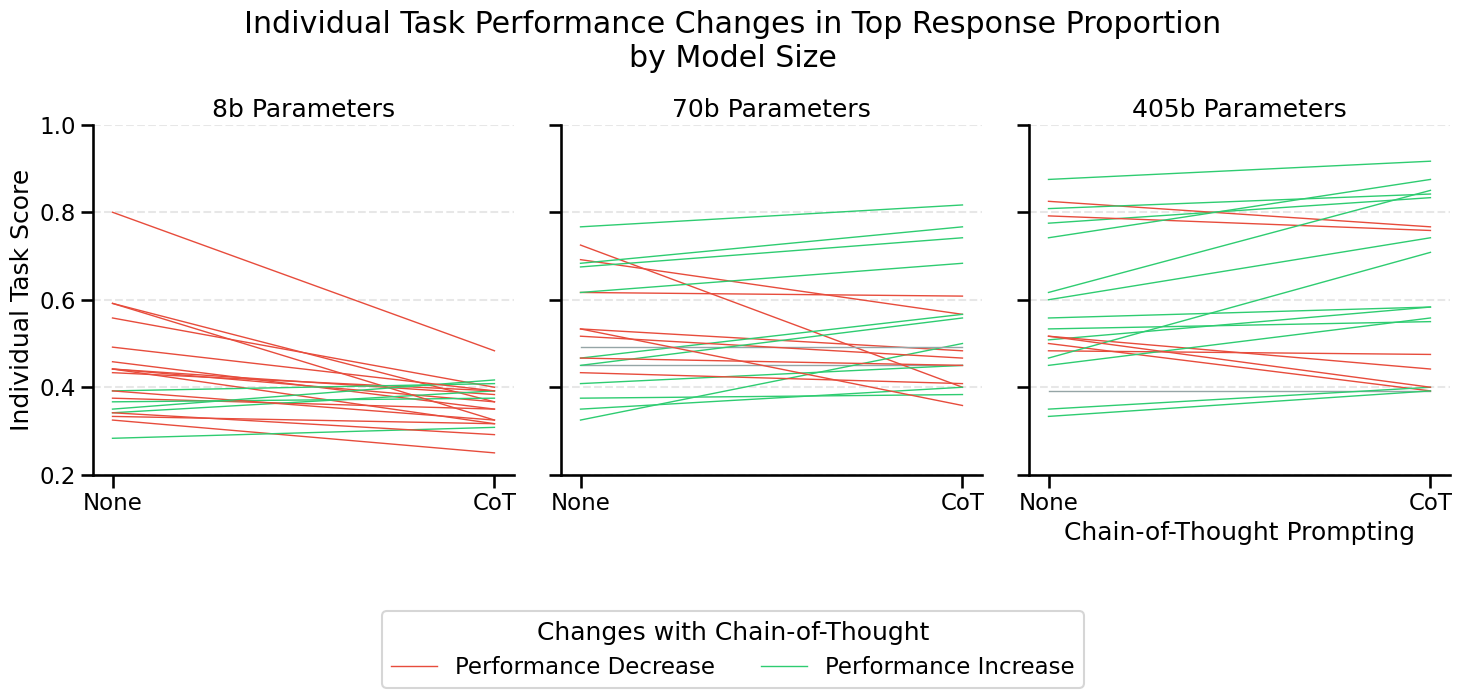

<Figure size 640x480 with 0 Axes>

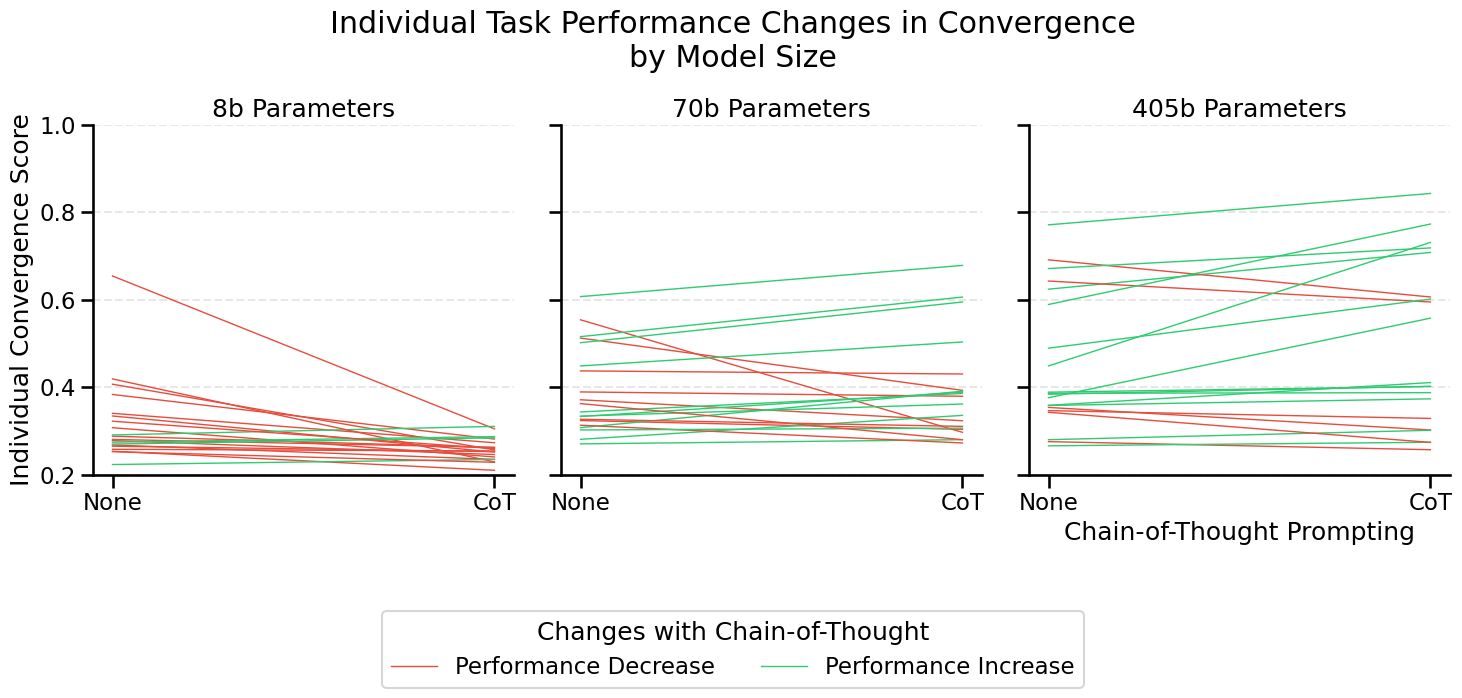

In [3]:
from src.analysis.visualization import (
    plot_model_comparison,
    create_comprehensive_analysis,
    plot_control_reasoning_bars
)
from src.analysis.df_formatting import print_nice_dataframe
create_comprehensive_analysis(long_df_31)
# plot_model_comparison(long_df_31)
# print_nice_dataframe(long_df_31)
# plot_control_reasoning_bars(long_df_31)